In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\manir\OneDrive\Desktop\feynn labs\Crop-Yield-Prediction-in-India-using-ML-main\Crop_recommendation_updated.csv"
data=pd.read_csv(path)
data.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data.shape

(2200, 5)

In [4]:
data.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   ph           2200 non-null   float64
 3   rainfall     2200 non-null   float64
 4   label        2200 non-null   object 
dtypes: float64(4), object(1)
memory usage: 86.1+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   ph           2200 non-null   float64
 3   rainfall     2200 non-null   float64
 4   label        2200 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 77.5 KB


In [9]:
data.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,20
1,21.770462,80.319644,7.038096,226.655537,20
2,23.004459,82.320763,7.840207,263.964248,20
3,26.491096,80.158363,6.980401,242.864034,20
4,20.130175,81.604873,7.628473,262.717340,20


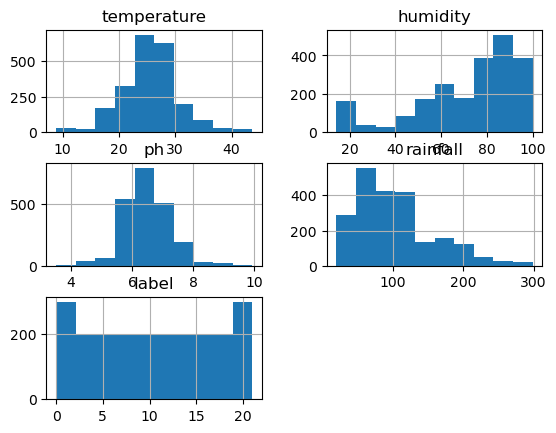

In [10]:
data.hist()
plt.show()

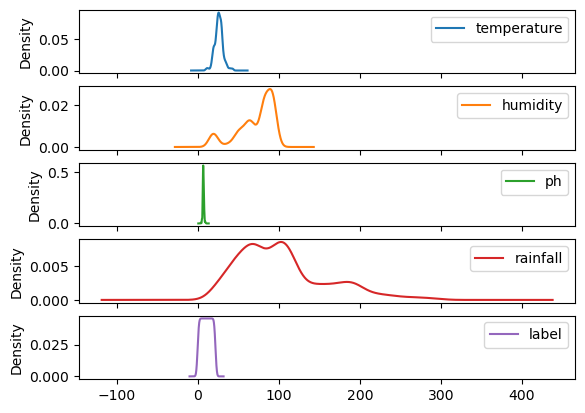

In [11]:
data.plot(kind='density',subplots=True)
plt.show()

<AxesSubplot:>

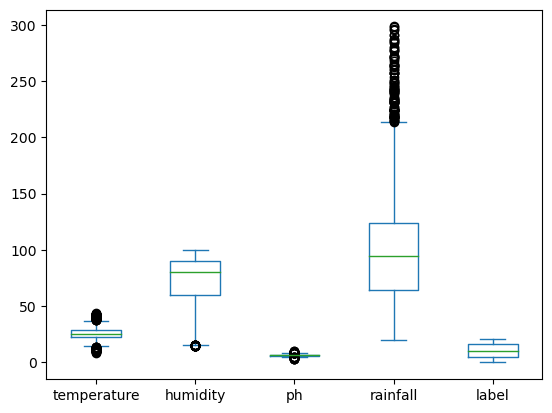

In [12]:
data.plot(kind='box')

In [13]:
data.shape

(2200, 5)

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

temperature     5.792279
humidity       29.686818
ph              0.951950
rainfall       59.715822
label          11.000000
dtype: float64


In [15]:
df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(1934, 5)

<AxesSubplot:>

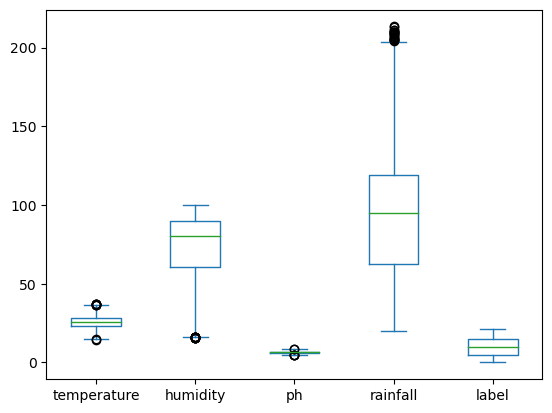

In [44]:
df_out.plot(kind='box')

In [30]:
corr_mat=df_out.corr()
corr_mat

,temperature,humidity,ph,rainfall,label
temperature,1.000000,0.185317,0.000586,-0.094677,0.083460
humidity,0.185317,1.000000,0.077908,-0.023181,0.126696
ph,0.000586,0.077908,1.000000,-0.145227,-0.011308
rainfall,-0.094677,-0.023181,-0.145227,1.000000,-0.143964
label,0.083460,0.126696,-0.011308,-0.143964,1.000000


In [31]:
dependent='label'
independent=df_out.columns.tolist()

In [32]:
independent.remove(dependent)

In [33]:
independent

['temperature', 'humidity', 'ph', 'rainfall']

In [34]:
x=df_out[independent].values
y=df_out[dependent].values

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [38]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred=reg.predict(x_test)

In [40]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  4,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 12,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  2],
       [ 4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  3],
       [ 0,  0,  0,  0,  2,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,

<AxesSubplot:>

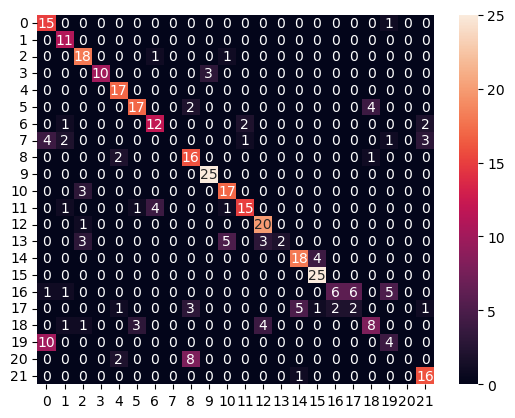

In [41]:
sns.heatmap(cnf_matrix, annot=True)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test,y_pred,average='macro'))

Accuracy: 0.7080103359173127
Precision: 0.6429143490387267
Recall: 0.6589398965888063


D:\Users\manir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.50      0.94      0.65        16
           1       0.65      1.00      0.79        11
           2       0.69      0.90      0.78        20
           3       1.00      0.77      0.87        13
           4       0.77      1.00      0.87        17
           5       0.81      0.74      0.77        23
           6       0.71      0.71      0.71        17
           7       0.00      0.00      0.00        11
           8       0.55      0.84      0.67        19
           9       0.89      1.00      0.94        25
          10       0.71      0.85      0.77        20
          11       0.83      0.68      0.75        22
          12       0.74      0.95      0.83        21
          13       1.00      0.15      0.27        13
          14       0.75      0.82      0.78        22
          15       0.83      1.00      0.91        25
          16       0.75      0.32      0.44        19
   

D:\Users\manir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\manir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\manir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
